In [1]:
'''
    kaggle master의 ipynb를 따라해보고 visualization, modeling과 관련해 노하우를 배우는 것을 목적으로 한다.
    kaggle master : Subin An
    link : https://www.kaggle.com/code/subinium/simple-matplotlib-visualization-tips/notebook
'''

'\n    kaggle master의 ipynb를 따라해보고 visualization, modeling과 관련해 노하우를 배우는 것을 목적으로 한다.\n    kaggle master : Subin An\n    link : https://www.kaggle.com/code/subinium/simple-matplotlib-visualization-tips/notebook\n'

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Alignments

import seaborn as sns # theme & dataset
print(f'Matplotlib Version : {mpl.__version__}')
print(f'Seaborn Version : {sns.__version__}')

# for visualization samples
import pandas as pd

netflix_titles = pd.read_csv("../../data/kaggle_practice/netflix_titles.csv")

Matplotlib Version : 3.5.1
Seaborn Version : 0.11.2


In [3]:
'''
    1. 그림의 dpi(dots per inch) 설정을 통해 해상도를 변경할 수 있다.
    matplotblib의 dafualt resolution은 72로 설정되어 있는데, 이 값을 조정하면서 그리는 것이 좀 더 전문가스럽다(professional).

    2. 모든 그림은 figsize를 설정할 수 있다. 비율에 따라 그림은 다른 느낌을 주기 때문에 휴리스틱하게(heuristic) 다양한 시도를 하는 것이 좋다.

    3. matplotlib은 다양한 곳에 title을 작성할 수 있다. 이 때 plt.title(), ax.set_title(), fig.suptitle() 등을 쓸 수 있다.
    font size, font family, fontweight(글꼴 두께), position(위치) 등을 고려해 제목을 추가하면 가독성이 좋아진다.
'''
plt.rcParams['figure.dpi']

72.0

### 1. Alignments

3 by 3 boxplot을 그리는 방법에는 다음과 같은 함수 조합이 있다.
- subplots
- subplot2grid
- add_axes
- gridspec, add_subplot
- inset_axes
- make_axes_locatable

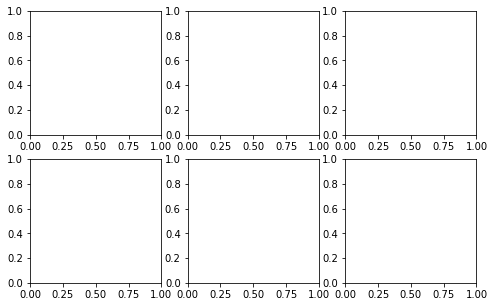

In [4]:
# plt.subplot의 parameter 첫 번째는 행의 수, 두 번째는 열의 수
fig, axes = plt.subplots(2, 3, figsize=(8, 5))
plt.show()
# 그래프가 좀 빽빽해서 답답해보인다.

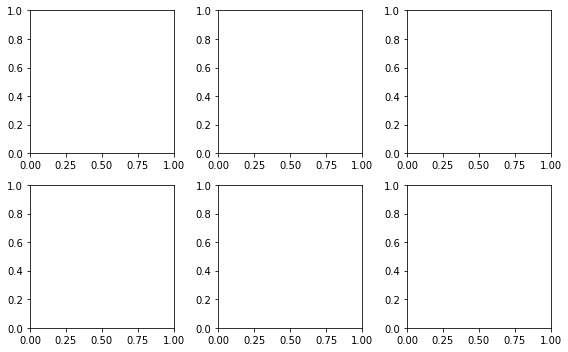

In [5]:
# plt.tight_layout() 함수를 이용해서 빽빽한 느낌을 해결한다.
fig, axes = plt.subplots(2, 3, figsize=(8, 5))
plt.tight_layout()
plt.show()
# 모두 같은 크기의 사각형일 필요는 없는 경우가 많다.

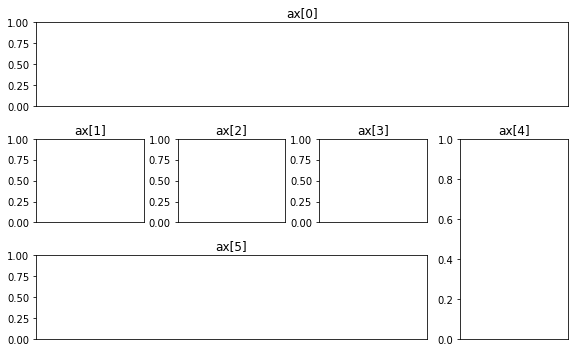

In [6]:
# plt.subplot2grid() 함수를 이용해서 layout을 변경한다.
# with subplot2grid

fig = plt.figure(figsize=(8, 5)) # initialize figure

ax = [None for _ in range(6)] # list to save many ax for setting parameter in each

ax[0] = plt.subplot2grid((3,4), (0,0), colspan=4)
ax[1] = plt.subplot2grid((3,4), (1,0), colspan=1)
ax[2] = plt.subplot2grid((3,4), (1,1), colspan=1)
ax[3] = plt.subplot2grid((3,4), (1,2), colspan=1)
ax[4] = plt.subplot2grid((3,4), (1,3), colspan=1, rowspan=2)
ax[5] = plt.subplot2grid((3,4), (2,0), colspan=3)

for ix in range(6):
    ax[ix].set_title(f'ax[{ix}]') # ax의 title을 구분한다.
    ax[ix].set_xticks([]) # x ticks를 제거
    # ax[ix].set_yticks([]) # y ticks를 제거

fig.tight_layout()
plt.show()
# x, y ticks를 제거하면 그림이 다크 모드에서는 안보인다!!

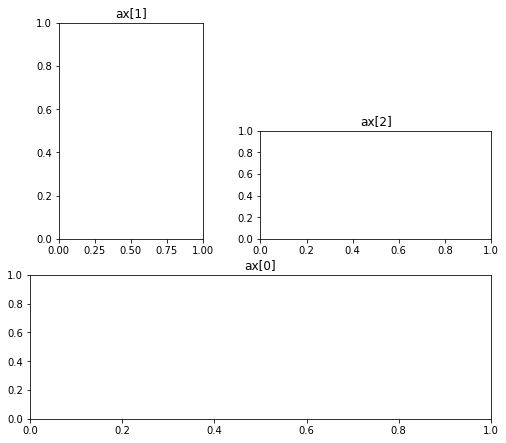

In [7]:
# 내가 원하는 ax를 만들려면 plt.add_axes()를 사용하는 방법도 있다(개인적으로 쓰기 어렵게 느껴진다).

fig = plt.figure(figsize=(8, 5))

ax = [None for _ in range(3)]

ax[0] = fig.add_axes([0.1, 0.1, 0.8, 0.4]) # x, y, dx, dy
ax[1] = fig.add_axes([0.15, 0.6, 0.25, 0.6])
ax[2] = fig.add_axes([0.5, 0.6, 0.4, 0.3])

for ix in range(3):
    ax[ix].set_title(f'ax[{ix}]')

plt.show()

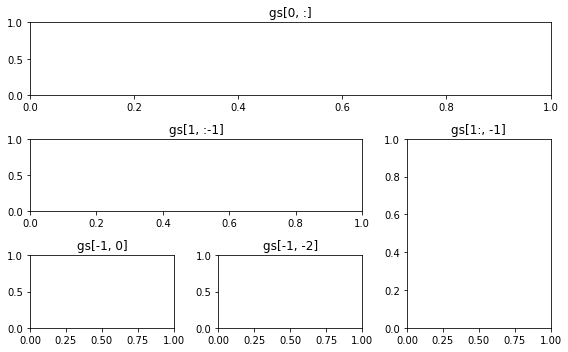

In [8]:
# add_gridspec(), add_subplot을 사용하는 방법도 있다.

fig = plt.figure(figsize=(8, 5))

gs = fig.add_gridspec(3, 3) # make 3 by 3 grid (row, col)

ax = [None for _ in range(5)]

ax[0] = fig.add_subplot(gs[0, :])
ax[0].set_title('gs[0, :]')

ax[1] = fig.add_subplot(gs[1, :-1]) # gs[1,:2]와 동일
ax[1].set_title('gs[1, :-1]')

ax[2] = fig.add_subplot(gs[1:, -1]) # gs[1:, 2]와 동일
ax[2].set_title('gs[1:, -1]')

ax[3] = fig.add_subplot(gs[-1, 0]) # gs[2:, 0]와 동일
ax[3].set_title('gs[-1, 0]')

ax[4] = fig.add_subplot(gs[-1, -2]) # gs[2, 1]와 동일
ax[4].set_title('gs[-1, -2]')

plt.tight_layout()


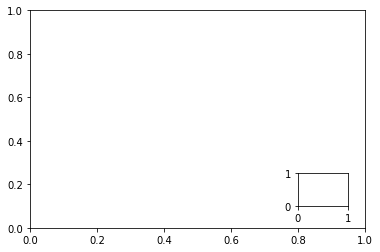

In [9]:
# inset_axes()를 사용해서 그림안에 그림영역을 넣을 수 있다.

fig, ax = plt.subplots()
axin1 = ax.inset_axes([0.8, 0.1, 0.15, 0.15])
plt.show()

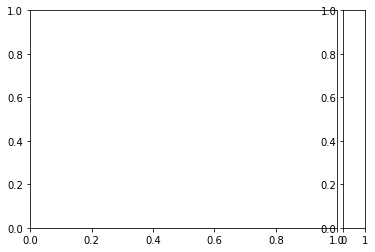

In [10]:
# make_axes_locatable을 사용해서 그림을 분할할 수 있다.
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, ax = plt.subplots(1, 1)
ax_divider = make_axes_locatable(ax)

ax = ax_divider.append_axes("right", size="7%", pad="2%")
plt.show()

### 2. Colormap

color는 당연히 그래프에서 매우 중요하고 이미 matplotlib 팀이 좋은 색상 palette를 만들었다. 우리는 그것을 잘 사용하면 되는 것이다.
- diverging
- qualitative
- sequential
- scientific

In [11]:
def cmap_plot(cmap_list, ctype):
    cmaps = cmap_list

    n = len(cmaps)

    fig = plt.figure(figsize=(8.25, n*.20), dpi=200)
    ax = plt.subplot(1, 1, 1, frameon=False, xlim=[0,10], xticks=[], yticks=[])
    fig.subplots_adjust(top=0.99, bottom=0.01, left=0.18, right=0.99)

    y, dy, pad = 0, 0.3, 0.08

    ticks, labels = [], []

    for cmap in cmaps[::-1]:
        Z = np.linspace(0,1,512).reshape(1,512)
        plt.imshow(Z, extent=[0,10,y,y+dy], cmap=plt.get_cmap(cmap))
        ticks.append(y+dy/2)
        labels.append(cmap)
        y = y + dy + pad

    ax.set_ylim(-pad,y)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)

    ax.tick_params(axis='y', which='both', length=0, labelsize=5)
    plt.title(f'{ctype} Colormap', fontweight='bold', fontsize=8)
    plt.show()

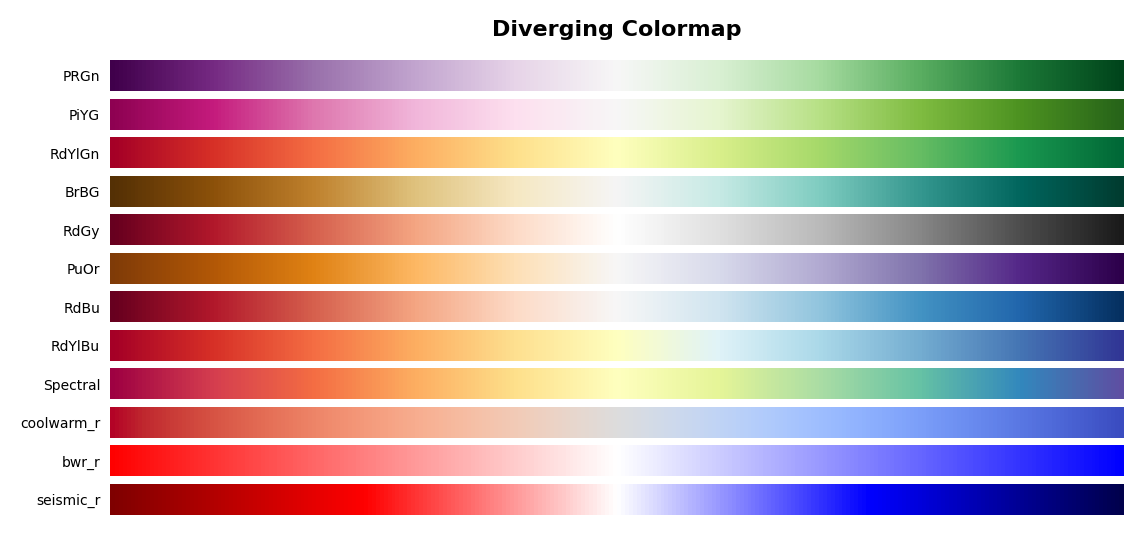

In [12]:
# Diverging Colormap
# median이 분명한 시각화에 사용되는 colormap
# (사용하기 조금 어렵게 느껴진다, 어떻게 사용해야 할 지 감이 없다.)

diverge_cmap = ('PRGn', 'PiYG', 'RdYlGn', 'BrBG', 'RdGy', 
                'PuOr', 'RdBu', 'RdYlBu', 'Spectral', 'coolwarm_r', 
                'bwr_r', 'seismic_r')
cmap_plot(diverge_cmap, 'Diverging')

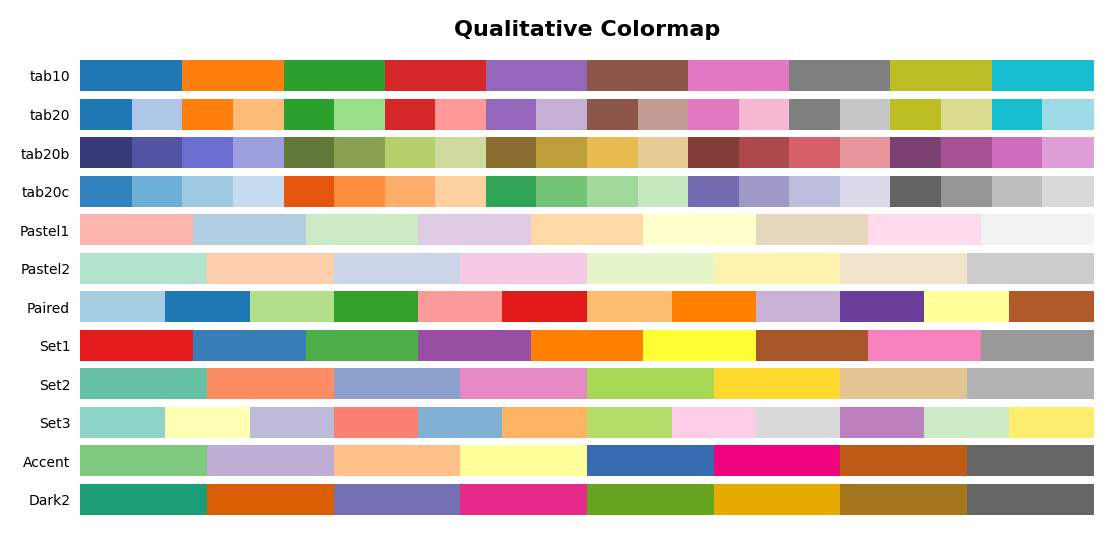

In [13]:
# Qualitative Colormap
# 범주형 변수에 자주 사용되는 독립 색상 팔레트

qualitative_cmap = ('tab10', 'tab20', 'tab20b', 'tab20c', 'Pastel1', 
                    'Pastel2', 'Paired', 'Set1', 'Set2', 'Set3', 
                    'Accent', 'Dark2')

cmap_plot(qualitative_cmap, 'Qualitative')

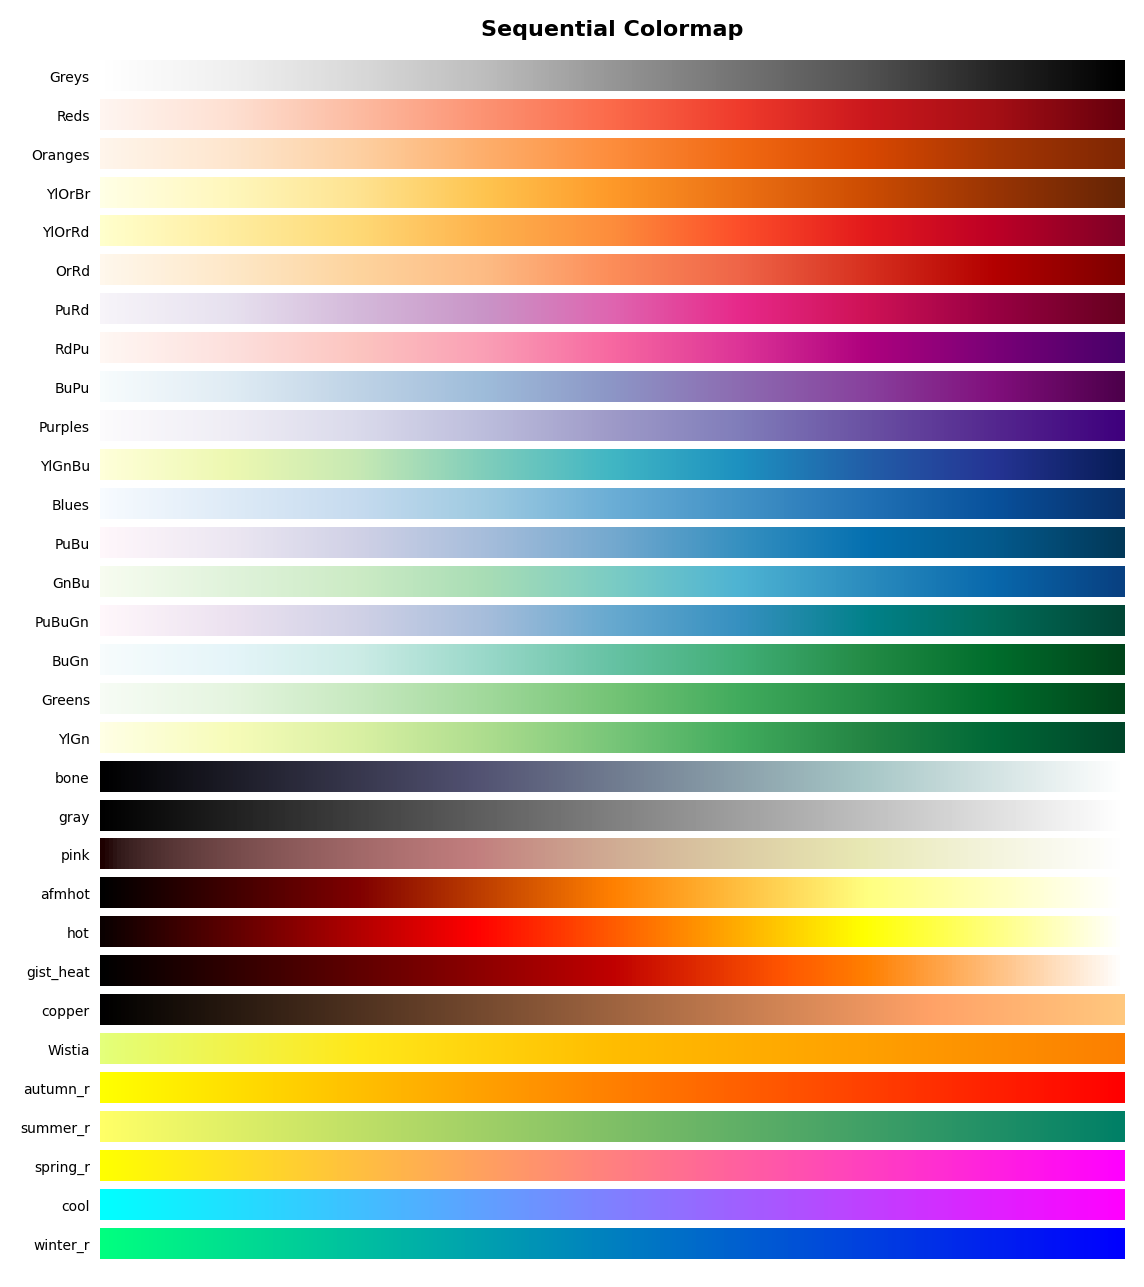

In [14]:
# Sequential Colormap
# 숫자 또는 정렬된 값이 있는 변수에 적합

sequential_cmap = ('Greys', 'Reds', 'Oranges', 'YlOrBr', 'YlOrRd', 
                    'OrRd', 'PuRd', 'RdPu', 'BuPu', 'Purples', 
                    'YlGnBu', 'Blues', 'PuBu', 'GnBu', 'PuBuGn', 
                    'BuGn', 'Greens', 'YlGn', 'bone', 'gray', 
                    'pink', 'afmhot', 'hot', 'gist_heat', 'copper', 
                    'Wistia', 'autumn_r', 'summer_r', 'spring_r', 'cool', 
                    'winter_r')            

cmap_plot(sequential_cmap, 'Sequential')

In [15]:
netflix_date = netflix_titles[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

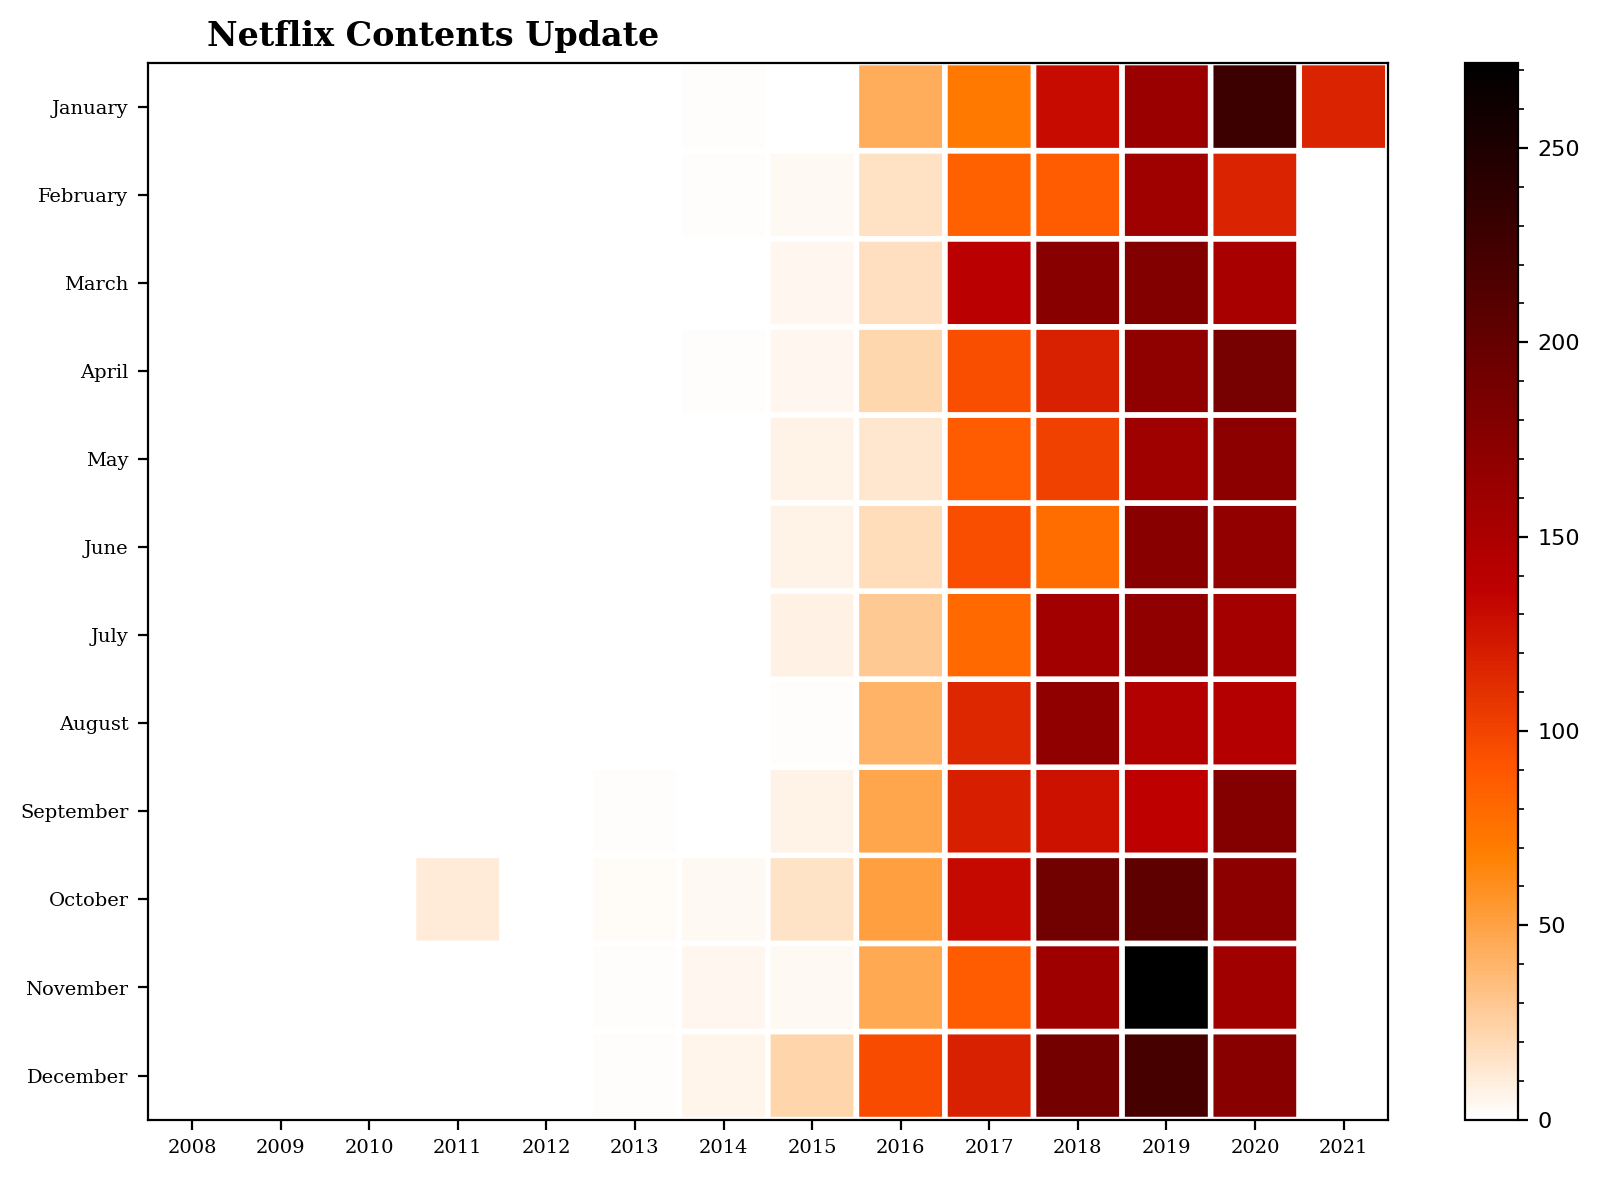

In [16]:
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='gist_heat_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='serif', fontweight='bold', position=(0.23, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

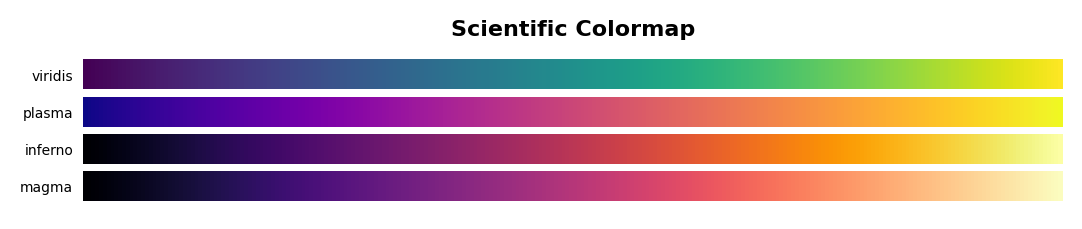

In [17]:
# Scientific Colormap
# 과학적 시각화에 유독 많이 쓰이는 느낌. 
# 보통 기본 컬러맵으로 사용되면서 상대적으로 전문가스러운 느낌을 준다.

scientific_cmap = ('viridis', 'plasma', 'inferno', 'magma')
cmap_plot(scientific_cmap, 'Scientific')

### 3. Text & Annotate & Patch

- ax.text
- ax.annotate

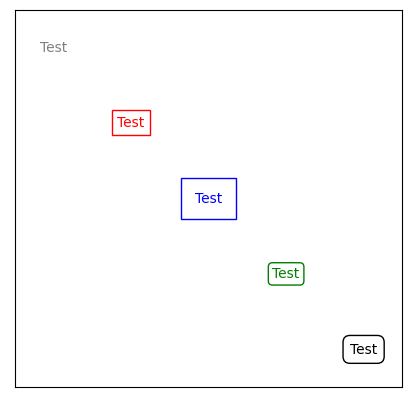

In [18]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)

# gray box
# ax.text의 처음 두 숫자는 그래프의 비율 좌표를 나타낸다.
# va, ha는 현재 좌표가 텍스트의 중심/왼쪽/오른쪽인지를 결정한다.
# color는 색상으로 custom color나 rgb, 미리 정의된 color 등을 쓸 수 있다.
ax.text(0.1, 0.9, 'Test', color='gray', va='center', ha='center')

# red box
# bbox는 텍스트를 감싸는 상자의 요소를 설정한다.
# facecolor는 내부색상, edgecolor는 가장자리 색상이다.
ax.text(0.3, 0.7, 'Test', color='red', va='center', ha='center', 
        bbox=dict(facecolor='none', edgecolor='red'))

# blue box
# bbox의 pad 옵션으로 공간 여유를 설정할 수 있다.
ax.text(0.5, 0.5, 'Test', color='blue', va='center', ha='center', 
        bbox=dict(facecolor='none', edgecolor='blue', pad=10.0))

# green box
# bbox의 boxstyle 옵션으로 직사각형의 끝을 조절할 수 있다.
ax.text(0.7, 0.3, 'Test', color='green', va='center', ha='center', 
        bbox=dict(facecolor='none', edgecolor='green', boxstyle='round'))

# Black
ax.text(0.9, 0.1, 'Test', color='black', va="center", ha="center",
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', pad=0.5))

ax.set_xticks([])
ax.set_yticks([])

plt.show()

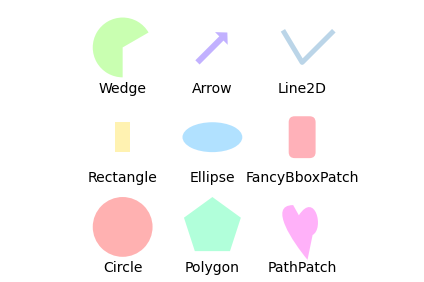

In [19]:
# 텍스트와 함께 patch를 사용하는 것도 효과적이다.

import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

def label(xy, text):
    y = xy[1] - 0.15  # shift y-value for label so that it's below the artist
    plt.text(xy[0], y, text, ha="center", family='sans-serif', size=14)

fig, ax = plt.subplots()
# create 3x3 grid to plot the artists
grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T

patches = []

# add a circle
circle = mpatches.Circle(grid[0], 0.1, ec="none")
patches.append(circle)
label(grid[0], "Circle")

# add a rectangle
rect = mpatches.Rectangle(grid[1] - [0.025, 0.05], 0.05, 0.1, ec="none")
patches.append(rect)
label(grid[1], "Rectangle")

# add a wedge
wedge = mpatches.Wedge(grid[2], 0.1, 30, 270, ec="none")
patches.append(wedge)
label(grid[2], "Wedge")

# add a Polygon
polygon = mpatches.RegularPolygon(grid[3], 5, 0.1)
patches.append(polygon)
label(grid[3], "Polygon")

# add an ellipse
ellipse = mpatches.Ellipse(grid[4], 0.2, 0.1)
patches.append(ellipse)
label(grid[4], "Ellipse")

# add an arrow
arrow = mpatches.Arrow(grid[5, 0] - 0.05, grid[5, 1] - 0.05, 0.1, 0.1,
                       width=0.1)
patches.append(arrow)
label(grid[5], "Arrow")

# add a path patch
Path = mpath.Path
path_data = [
    (Path.MOVETO, [0.018, -0.11]),
    (Path.CURVE4, [-0.031, -0.051]),
    (Path.CURVE4, [-0.115, 0.073]),
    (Path.CURVE4, [-0.03, 0.073]),
    (Path.LINETO, [-0.011, 0.039]),
    (Path.CURVE4, [0.043, 0.121]),
    (Path.CURVE4, [0.075, -0.005]),
    (Path.CURVE4, [0.035, -0.027]),
    (Path.CLOSEPOLY, [0.018, -0.11])]
codes, verts = zip(*path_data)
path = mpath.Path(verts + grid[6], codes)
patch = mpatches.PathPatch(path)
patches.append(patch)
label(grid[6], "PathPatch")

# add a fancy box
fancybox = mpatches.FancyBboxPatch(
    grid[7] - [0.025, 0.05], 0.05, 0.1,
    boxstyle=mpatches.BoxStyle("Round", pad=0.02))
patches.append(fancybox)
label(grid[7], "FancyBboxPatch")

# add a line
x, y = np.array([[-0.06, 0.0, 0.1], [0.05, -0.05, 0.05]])
line = mlines.Line2D(x + grid[8, 0], y + grid[8, 1], lw=5., alpha=0.3)
label(grid[8], "Line2D")

# 그림 파트
colors = np.linspace(0, 1, len(patches))
collection = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.3)
collection.set_array(np.array(colors))
ax.add_collection(collection)
ax.add_line(line)

plt.axis('equal')
plt.axis('off')
plt.tight_layout()

plt.show()

### 4. Detail & Examples

- horizontal and vertical barplot
- border(edge) color and thickness
- main color & sub color
- transparency
- span

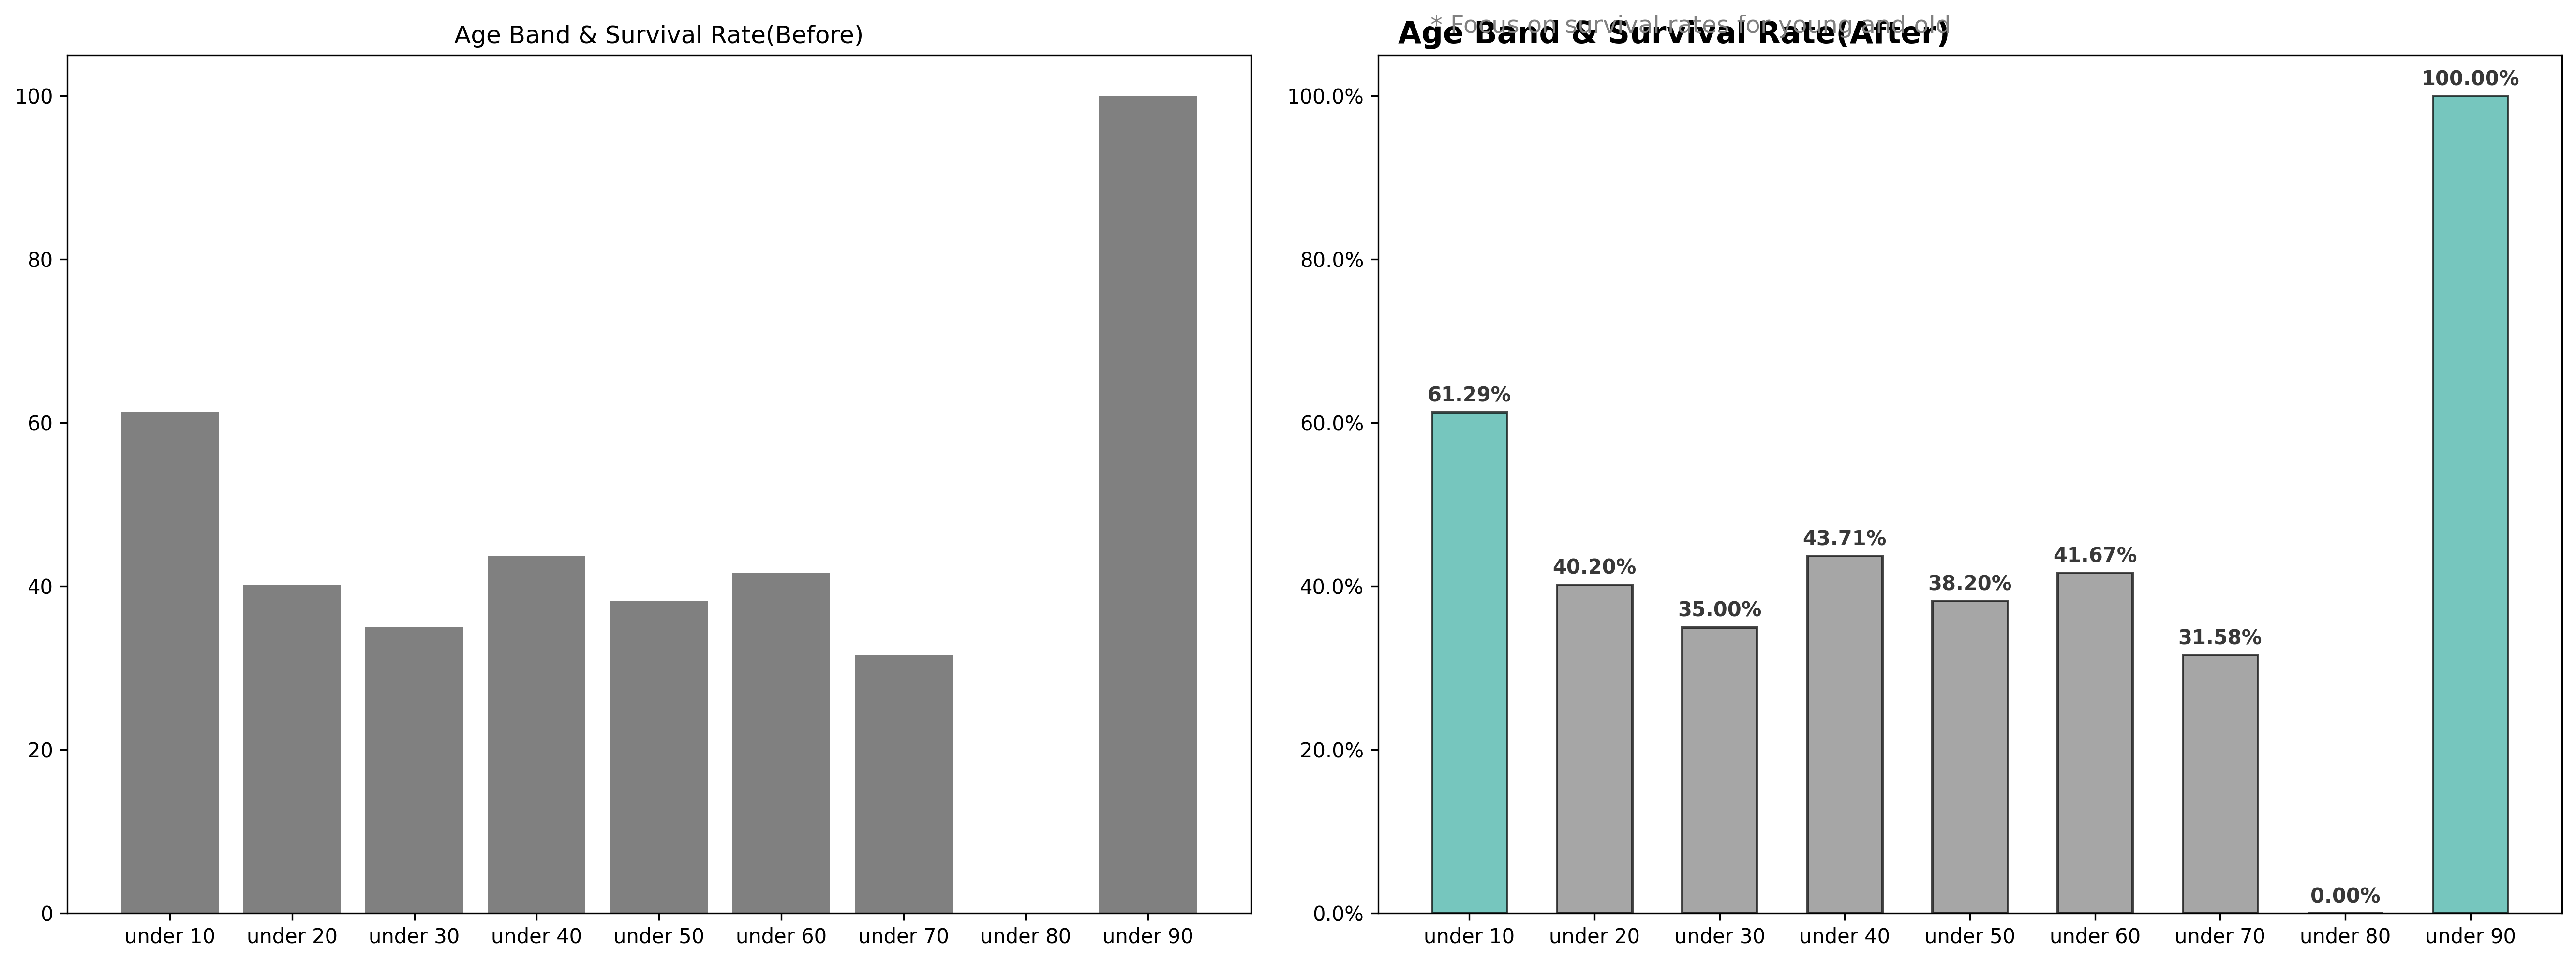

In [20]:
# Main Color & Sub Color
from matplotlib.ticker import FuncFormatter
def age_band(num):
    for i in range(1, 100):
        if num < 10*i : 
            return f'under {i*10}'
 
titanic_train = pd.read_csv("../../data/kaggle_practice/titanic_train.csv")
titanic_train['age_band'] = titanic_train['Age'].apply(age_band)
titanic_age = titanic_train[['age_band', 'Survived']].groupby('age_band')['Survived'].value_counts().sort_index().unstack().fillna(0)

titanic_age['Survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100

fig, ax = plt.subplots(1, 2, figsize=(18, 7), dpi=300)

# ax1
ax[0].bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'], color='gray')
ax[0].set_title('Age Band & Survival Rate(Before)')

# ax2
color_map = ['gray' for _ in range(9)]
color_map[0] = color_map[8] = '#3caea3'
ax[1].bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'], alpha=0.7, color=color_map, width=0.6, edgecolor='black', linewidth=1.2)
ax[1].set_title('Age Band & Survival Rate(After)', fontsize=15, fontweight='bold', position=(0.25, 1.0+0.05))
for i in titanic_age['Survival rate'].index:
    ax[1].annotate(f"{titanic_age['Survival rate'][i]:.02f}%", 
                   xy=(i, titanic_age['Survival rate'][i] + 2),
                   va = 'center', ha='center',fontweight='bold', color='#383838'
                  )

ax[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:}%')) 
plt.suptitle('* Focus on survival rates for young and old', x=0.65, y=0.94, color='gray')
plt.subplots_adjust(left=0.5, right=0.8)
plt.tight_layout()
plt.show()

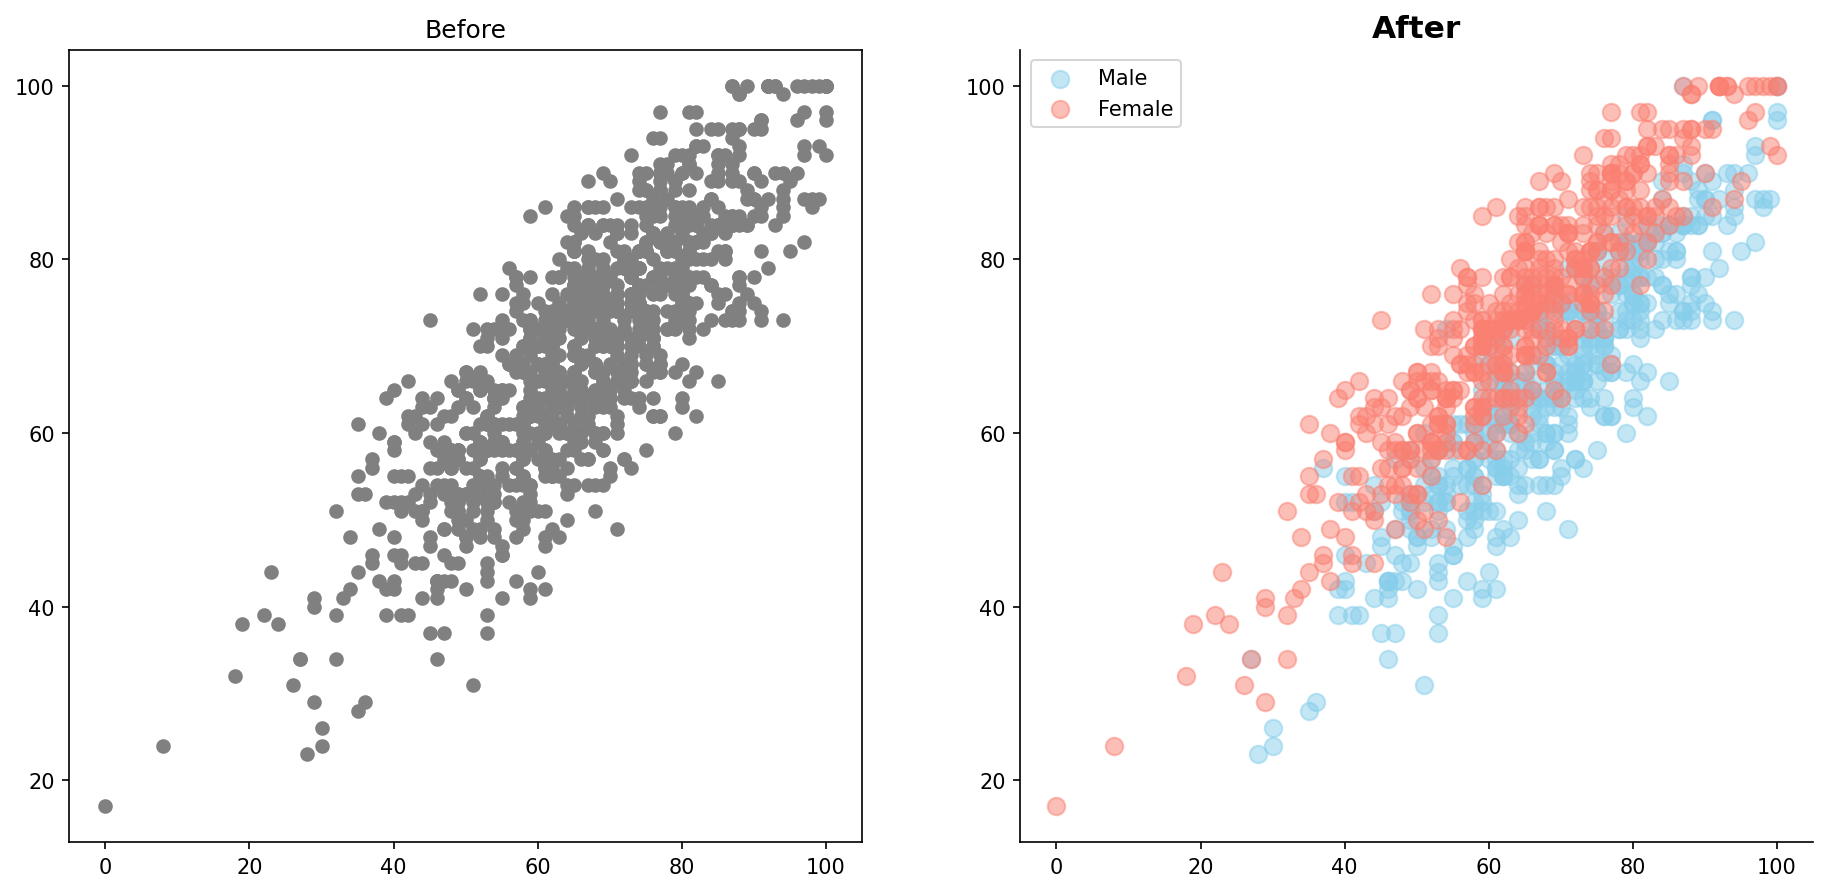

In [21]:
# Transparency
import seaborn as sns
exam_data = pd.read_csv("../../data/kaggle_practice/StudentsPerformance.csv")
fig, ax = plt.subplots(1, 2, figsize = (15, 7), dpi=150)

ax[0].scatter(x='math score', y='reading score',data=exam_data, color='gray')
ax[0].set_title('Before')

# You can use sns.scatterplot + hue parameter
ax[1].scatter(x='math score', y='reading score',data=exam_data[exam_data['gender']=='male'], color='skyblue', alpha=0.5, label='Male', s=70)
ax[1].scatter(x='math score', y='reading score',data=exam_data[exam_data['gender']=='female'], color='salmon', alpha=0.5, label='Female', s=70)
ax[1].set_title('After', fontsize=15, fontweight='bold')

ax[1].legend()

# upper & right border remove 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

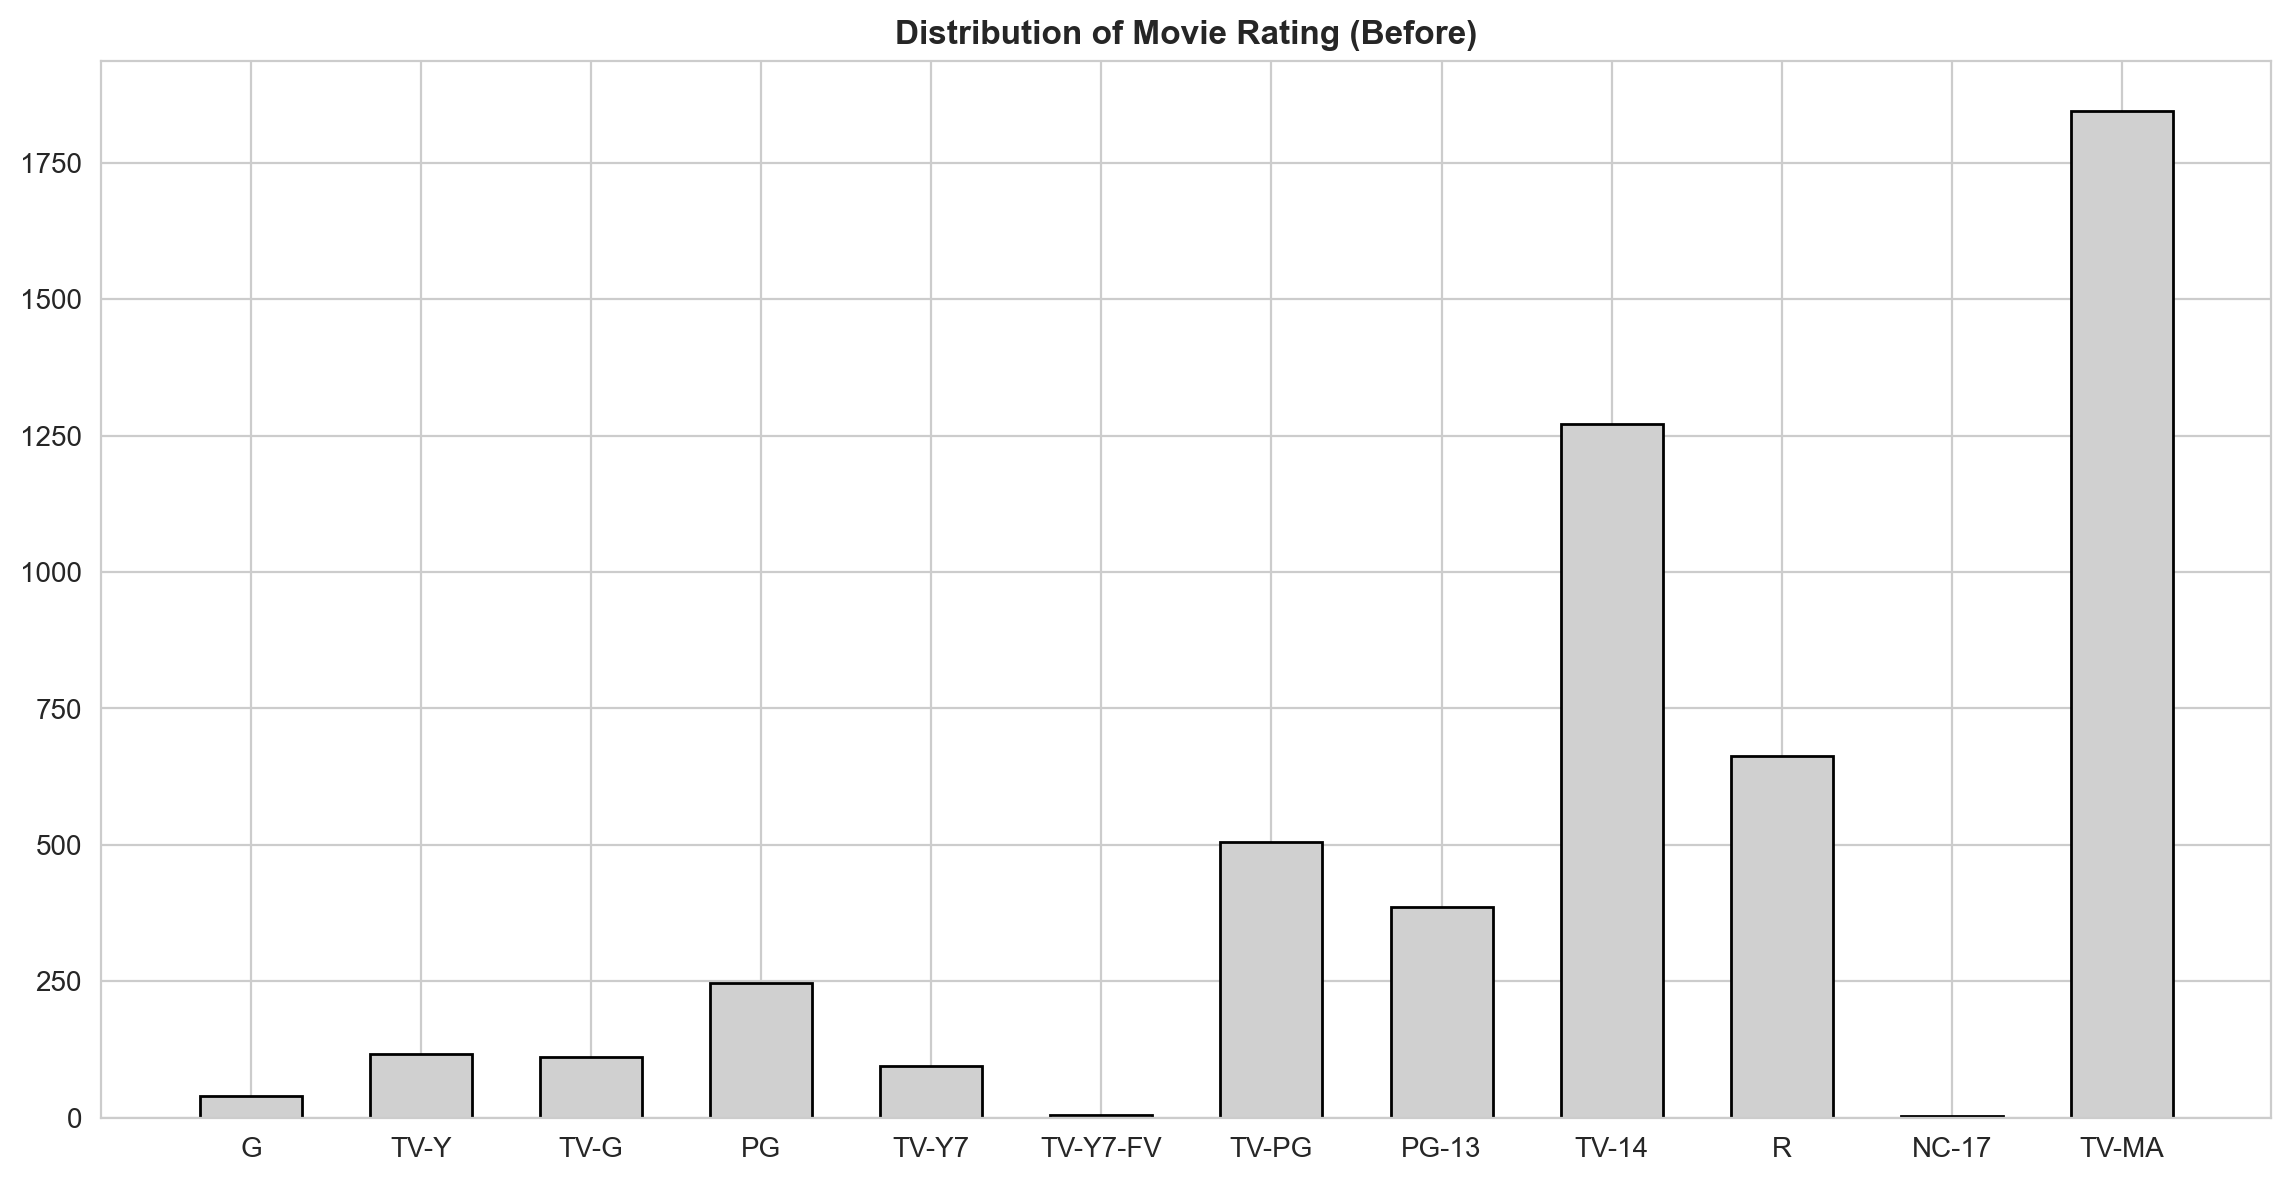

In [22]:
# span
# axvspan : vertical spane
# axhspan : horizontal span

# preprocessing
sns.set_style('whitegrid') # plot with grid

movie = netflix_titles[netflix_titles['type'] == 'Movie']    
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
movie_rating = movie['rating'].value_counts()[rating_order]

fig, ax = plt.subplots(1, 1, figsize=(14, 7), dpi=200)
ax.bar(movie_rating.index, movie_rating,  color="#d0d0d0", width=0.6, edgecolor='black')
ax.set_title(f'Distribution of Movie Rating (Before)', fontweight='bold')
plt.show()

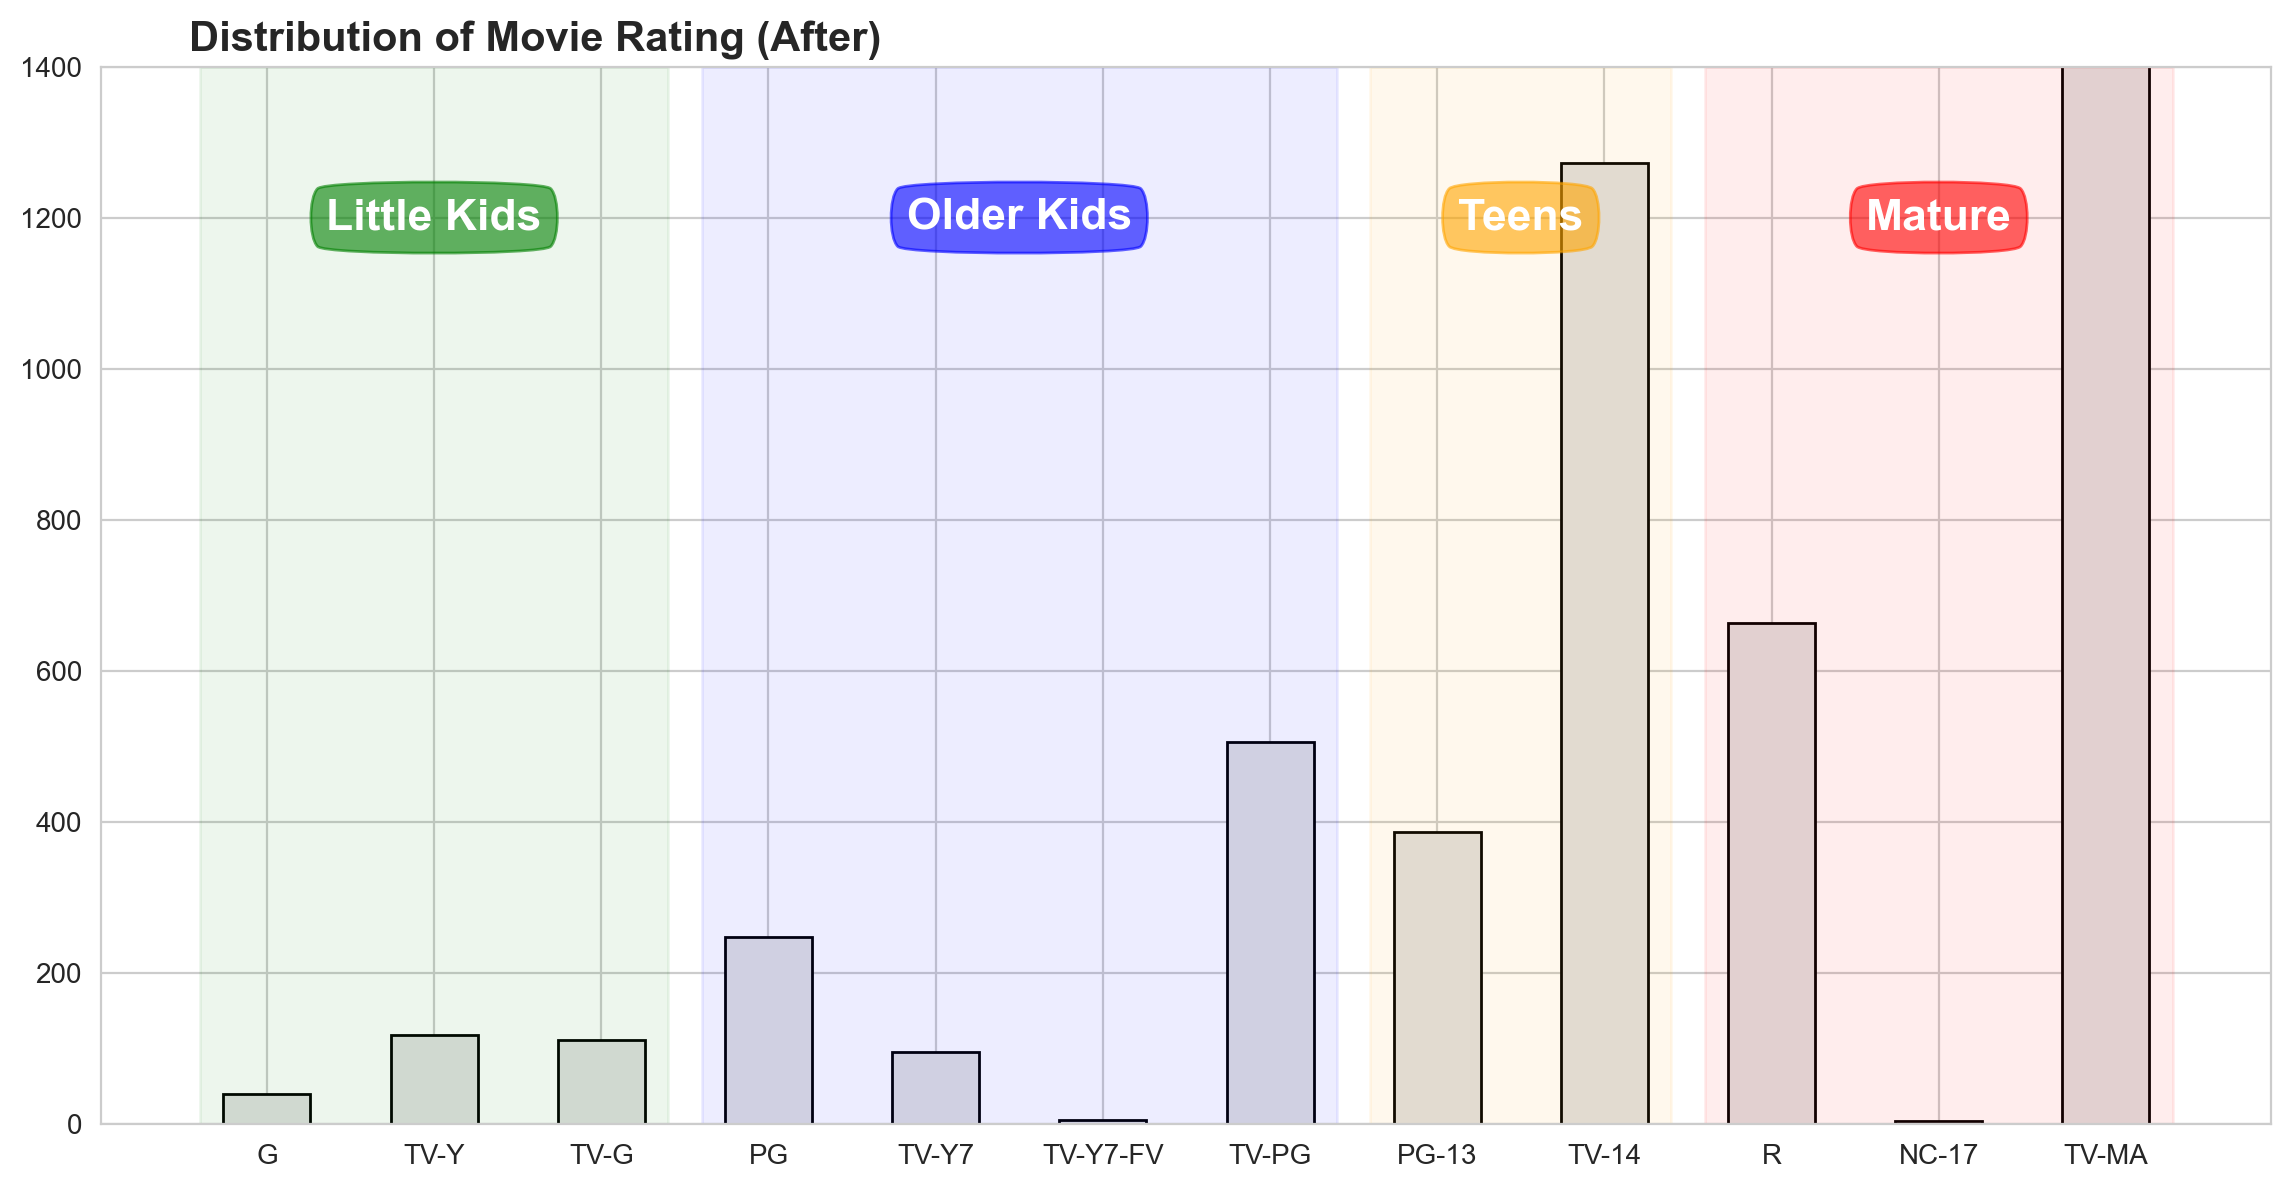

In [23]:
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(14, 7), dpi=200)
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#e0e0e0", width=0.52, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.07)
    ax.set_title(f'Distribution of {title} Rating (After)', fontsize=15, fontweight='bold', position=(0.20, 1.0+0.03))
    plt.show()

rating_barplot(movie_rating,'Movie', 1200, 1400)

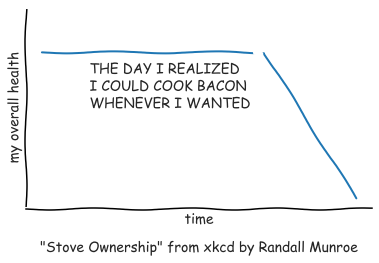

In [24]:
import matplotlib
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Munroe
    # https://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    ax.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    ax.plot(data)

    ax.set_xlabel('time')
    ax.set_ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Munroe',
        ha='center')

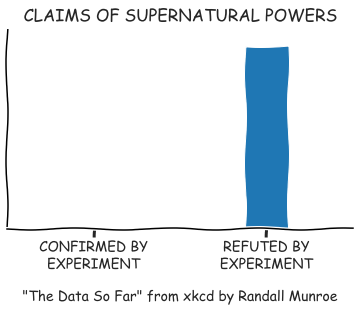

In [25]:
with plt.xkcd():
    # Based on "The Data So Far" from XKCD by Randall Munroe
    # https://xkcd.com/373/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.bar([0, 1], [0, 100], 0.25)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
    ax.set_xlim([-0.5, 1.5])
    ax.set_yticks([])
    ax.set_ylim([0, 110])

    ax.set_title("CLAIMS OF SUPERNATURAL POWERS")

    fig.text(
        0.5, -0.05,
        '"The Data So Far" from xkcd by Randall Munroe',
        ha='center')

plt.show()

In [26]:
# dpi 비교도 해보면 느낌을 알 까 싶다.
# color쪽은 아직 좀 어려운 것 같다. 
# 요모조모 뜯어봐야 이해도가 생기고 활용할 수 있을 것 같다.
# color만이 아니라 대체로 코드를 다 모른다. 다 띁어봐야 하나씩 알 것 같다.
